In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

In [10]:
data= pd.read_csv("corporate_work_hours_productivity.csv")

In [11]:
data.head()

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5


In [12]:
data.isnull().sum()

Employee_ID                0
Age                        0
Department                 0
Job_Level                  0
Years_at_Company           0
Monthly_Hours_Worked       0
Remote_Work                0
Meetings_per_Week          0
Tasks_Completed_Per_Day    0
Overtime_Hours_Per_Week    0
Work_Life_Balance          0
Job_Satisfaction           0
Productivity_Score         0
Annual_Salary              0
Absences_Per_Year          0
dtype: int64

In [13]:
data.dtypes

Employee_ID                  int64
Age                          int64
Department                  object
Job_Level                   object
Years_at_Company             int64
Monthly_Hours_Worked         int64
Remote_Work                 object
Meetings_per_Week            int64
Tasks_Completed_Per_Day      int64
Overtime_Hours_Per_Week      int64
Work_Life_Balance           object
Job_Satisfaction             int64
Productivity_Score         float64
Annual_Salary                int64
Absences_Per_Year            int64
dtype: object

/var/folders/ms/dbvk3wss62q_f_t3l5dr51600000gn/T/ipykernel_91964/1929355458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Remote_Work", y="Count", data=remote_work, palette="Set2")


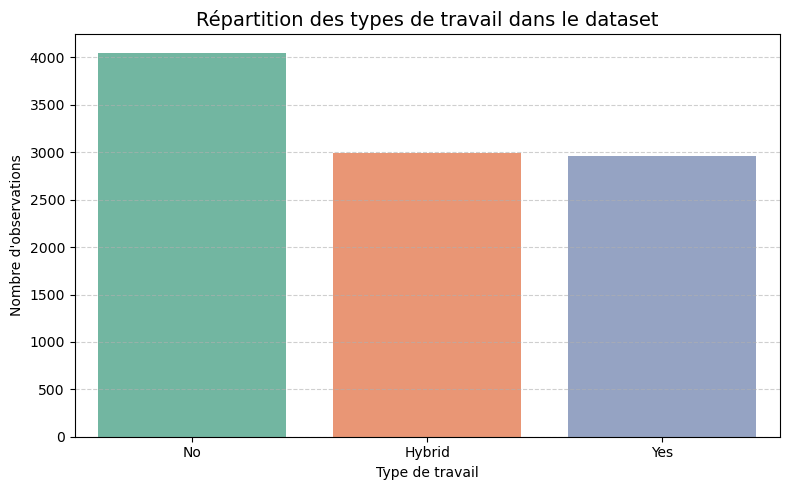

In [14]:
#Tracons un diagramme representatif des differents  types de travail
# Comptage des différents types de travail (Remote_Work)
remote_work = data["Remote_Work"].value_counts().reset_index()
remote_work.columns = ["Remote_Work", "Count"]

# Diagramme en barres du nombre d'observations par type de travail
plt.figure(figsize=(8, 5))
sns.barplot(x="Remote_Work", y="Count", data=remote_work, palette="Set2")

# Titres et étiquettes
plt.title("Répartition des types de travail dans le dataset", fontsize=14)
plt.xlabel("Type de travail")
plt.ylabel("Nombre d'observations")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/var/folders/ms/dbvk3wss62q_f_t3l5dr51600000gn/T/ipykernel_91964/1239037179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Remote_Work", y="Productivity_Score", data=mean_productivity, palette="Set2")


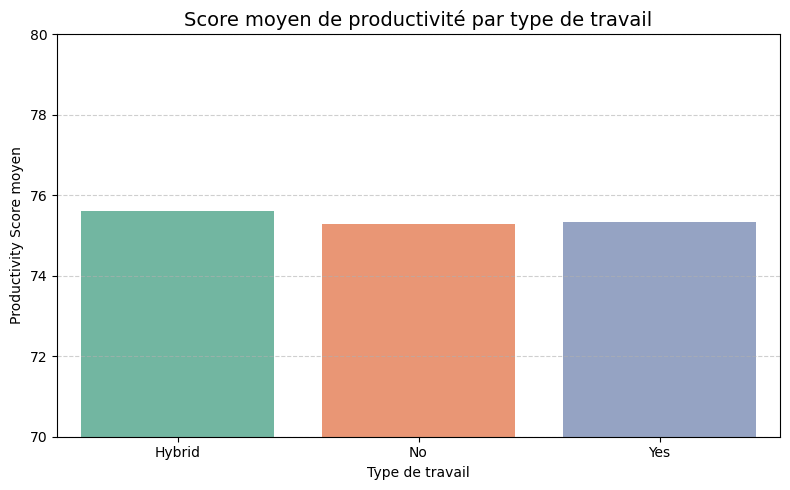

In [15]:
 

# Calcul de la moyenne de productivité par type de travail
mean_productivity = data.groupby("Remote_Work")["Productivity_Score"].mean().reset_index()

# Création du diagramme en barres
plt.figure(figsize=(8, 5))
sns.barplot(x="Remote_Work", y="Productivity_Score", data=mean_productivity, palette="Set2")

# Titres et étiquettes
plt.title("Score moyen de productivité par type de travail", fontsize=14)
plt.xlabel("Type de travail")
plt.ylabel("Productivity Score moyen")

# Grille et limites
plt.ylim(70, 80)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Affichage
plt.tight_layout()
plt.show()


In [16]:
#On creer 3 differents classes de productivité selon le score
data["Productivity_Class"] = pd.qcut(data["Productivity_Score"], q=3, labels=[0, 1, 2]).astype(int)

# Vérifier la répartition
print(data["Productivity_Class"].value_counts().sort_index())

Productivity_Class
0    3333
1    3334
2    3333
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

# Variables à supprimer
drop_cols = ["Employee_ID", "Productivity_Score"]  
X = data.drop(columns=drop_cols + ["Productivity_Class"])
y = data["Productivity_Class"]

# Encodage des variables catégorielles
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Vérification des données prêtes pour le modèle
print(X_encoded.head())


   Age  Department  Job_Level  Years_at_Company  Monthly_Hours_Worked  \
0   45           3          2                29                   198   
1   38           3          2                 7                   157   
2   53           5          2                 8                   146   
3   46           0          2                 4                   200   
4   28           0          1                 5                   193   

   Remote_Work  Meetings_per_Week  Tasks_Completed_Per_Day  \
0            1                  1                        7   
1            2                 13                        3   
2            1                  2                       15   
3            1                  4                        9   
4            0                 11                        9   

   Overtime_Hours_Per_Week  Work_Life_Balance  Job_Satisfaction  \
0                        1                  2                 5   
1                       10                  1         

In [18]:
# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Modèle de classification
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.32      0.35      0.33       667
           1       0.33      0.32      0.32       667
           2       0.34      0.32      0.33       666

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000



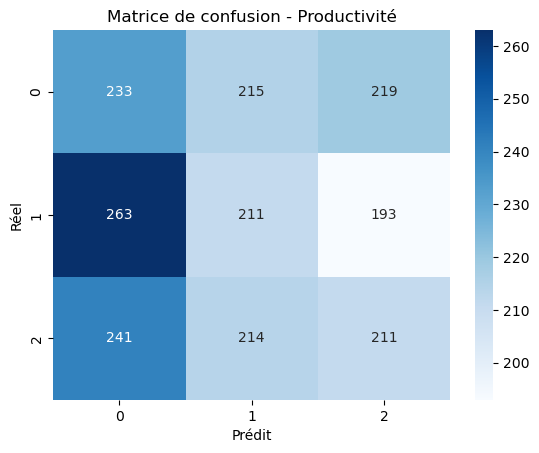

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
 
# Prédiction
y_pred = clf.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Productivité")
plt.show()


In [24]:
from sklearn.compose import ColumnTransformer
# Identifier les colonnes catégorielles
cat_cols = X.select_dtypes(include="object").columns.tolist()

# Pipeline de prétraitement
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")


In [26]:
 
# Pipeline complet
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:48:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Department', 'Job_Level',
                                                   'Remote_Work',
                                                   'Work_Life_Balance'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=N...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

              precision    recall  f1-score   support

           0       0.31      0.34      0.33       667
           1       0.35      0.34      0.35       667
           2       0.34      0.32      0.33       666

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000



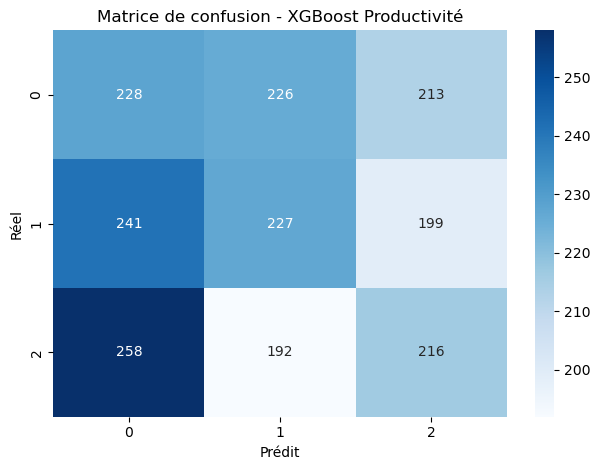

In [28]:
# Prédictions
y_pred = pipeline.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - XGBoost Productivité")
plt.tight_layout()
plt.show()
